# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

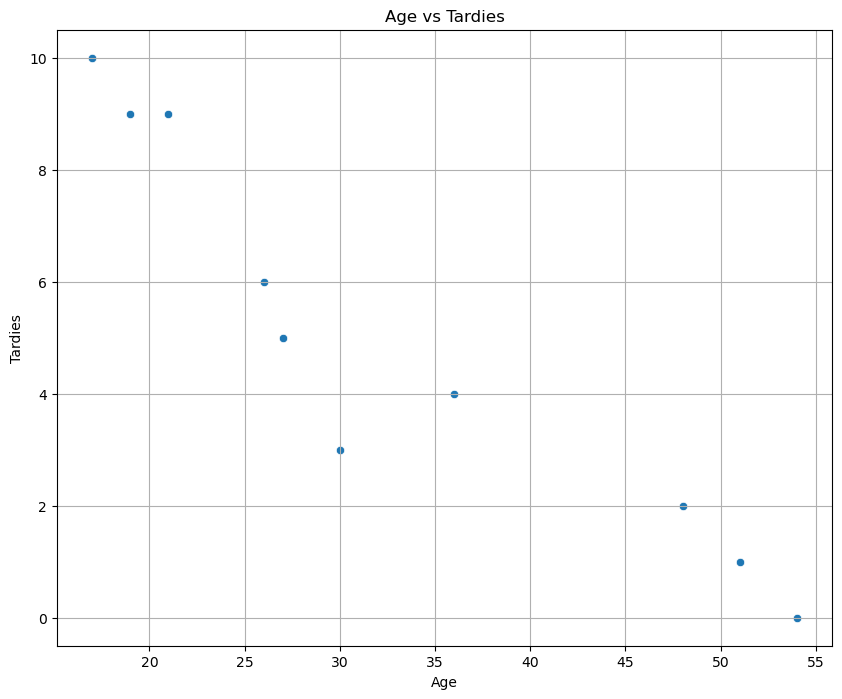

In [4]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=student_data, x ='Age', y='Tardies')
plt.title('Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.grid(True)
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*
Yes there is a trend. when x(age) increases, y(tardies) decreases, which suggesets a inversely proportional relationship between age and tardiness

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Covariance and Correlation
covariance = student_data.cov().loc['Age', 'Tardies']
correlation = student_data.corr().loc['Age', 'Tardies']
print("Covariance:", covariance)
print("Correlation:", correlation)

Covariance: -45.56666666666667
Correlation: -0.9391626886887121


Both measures shows the inversely proportionality of the two variables. The correlation is 1 to 0.93, which suggests a strong relationship between age and tardiness

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
X = student_data[['Age']]
y = student_data['Tardies']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2, random_state=42)

print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(10, 1) (8, 1) (2, 1)
(10,) (8,) (2,)


In [8]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lm= LinearRegression()
lm.fit(X_train, y_train)

print(lm.intercept_, lm.coef_)

13.46408839779005 [-0.26657459]


Plot your regression model on your scatter plot.

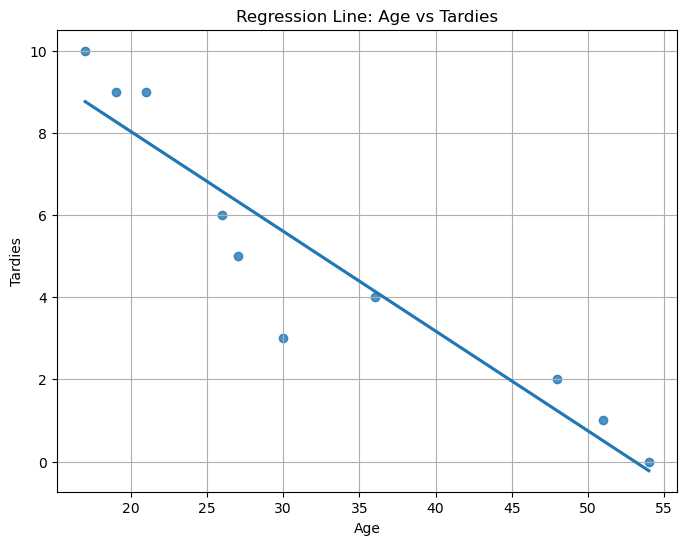

In [9]:
plt.figure(figsize=(8, 6))
sns.regplot(data=student_data, x='Age', y='Tardies', ci=None)
plt.title('Regression Line: Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.grid(True)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*
Type of model is linear regression.
The outcome variable(y) is Tardies.
Age is a good predictor of tardiness.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
# Import any libraries you may need & the data
vehicles = pd.read_csv(r"C:\Users\diplo\Desktop\Lab\lab-regression-analysis-en\vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [12]:
vars_of_interest = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
vehicles_filtered = vehicles[vars_of_interest].dropna()
correlation_matrix = vehicles_filtered.corr()
print(correlation_matrix['CO2 Emission Grams/Mile'])

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [13]:
model2 = smf.ols('Q("CO2 Emission Grams/Mile") ~ Year + Cylinders + Q("Fuel Barrels/Year") + Q("Combined MPG") + Q("Fuel Cost/Year")', data=vehicles_filtered).fit()
print(model2.summary())


                                 OLS Regression Results                                 
Dep. Variable:     Q("CO2 Emission Grams/Mile")   R-squared:                       0.981
Model:                                      OLS   Adj. R-squared:                  0.981
Method:                           Least Squares   F-statistic:                 3.687e+05
Date:                          Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                                  08:02:24   Log-Likelihood:            -1.5173e+05
No. Observations:                         35952   AIC:                         3.035e+05
Df Residuals:                             35946   BIC:                         3.035e+05
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your code here.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [14]:
party_data = pd.DataFrame({
    'Invited': [1, 3, 4, 6, 8, 9, 11, 14],
    'Attended': [1, 2, 4, 4, 5, 7, 8, 13]
})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

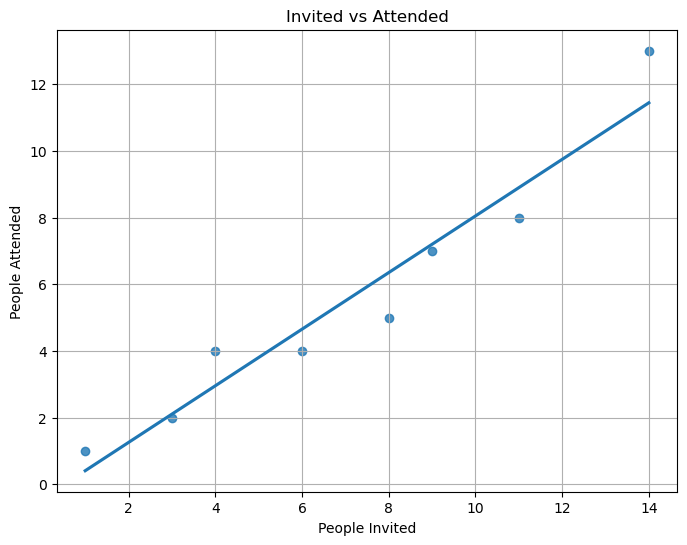

In [15]:
plt.figure(figsize=(8, 6))
sns.regplot(data=party_data, x='Invited', y='Attended', ci=None)
plt.title('Invited vs Attended')
plt.xlabel('People Invited')
plt.ylabel('People Attended')
plt.grid(True)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

c:\Users\diplo\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


                            OLS Regression Results                            
Dep. Variable:               Attended   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           0.000102
Time:                        08:08:19   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.5

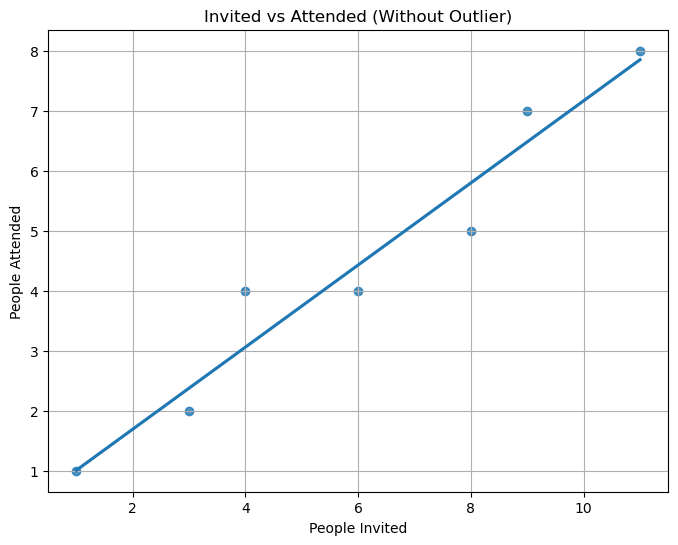

                            OLS Regression Results                            
Dep. Variable:               Attended   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           0.000264
Time:                        08:08:20   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3233      0.513      0.630      0.5

c:\Users\diplo\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [16]:
# Regression model
party_model = smf.ols('Attended ~ Invited', data=party_data).fit()
print(party_model.summary())

# Remove outlier (14 invited, 13 attended)
party_data_filtered = party_data[party_data['Invited'] != 14]

# New plot after removing outlier
plt.figure(figsize=(8, 6))
sns.regplot(data=party_data_filtered, x='Invited', y='Attended', ci=None)
plt.title('Invited vs Attended (Without Outlier)')
plt.xlabel('People Invited')
plt.ylabel('People Attended')
plt.grid(True)
plt.show()

# New regression model without outlier
party_model_filtered = smf.ols('Attended ~ Invited', data=party_data_filtered).fit()
print(party_model_filtered.summary())

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*